## Install libraries if necessary

In [3]:


"""Comment out and run cell to install libraries"""
#!pip3 install ipympl
#!pip3 install ipywidgets
#!pip3 install matplotlib
#!pip3 install numpy
#!pip3 install scipy
#!pip3 install pandas_datareader
#!pip3 install yfinance

'Comment out and run cell to install libraries'

## Import libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from datetime import date, timedelta
import yfinance as yahooFinance
import ipympl

## Functions to import price data and trading dates

In [5]:
def read_price_data(stock_symbol, start_date, end_date, interval):
    """Import price data from Yahoo Finance"""
    stock_data = web.get_data_yahoo(stock_symbol, start_date, end_date, interval=interval)
    price_series = stock_data.loc[:, 'Adj Close']
    price_series = price_series.fillna(method='ffill')

    return price_series

In [6]:
def get_date_list(stock_symbol, start_date, end_date, interval):
    """Generate list of trading dates"""
    stock_data = web.get_data_yahoo(stock_symbol, start_date, end_date, interval=interval)
    date_list = stock_data.index
    
    return date_list

## Import stock data

In [7]:
# Set time period
start_date = datetime.datetime(2019, 7, 1)
end_date = datetime.datetime(2022, 10, 1)
interval = 'd' # Date interval, by default daily ('d')

def getStockData(stock_symbol):
    # Import price series and list of trading days
    try:
        date_list = get_date_list(stock_symbol, start_date, end_date, interval=interval)

        price_series = read_price_data(stock_symbol, start_date, end_date, interval=interval)


    except:
        print('Import failed for ', stock_symbol, "\n Retrying")
        date_list, price_series, date_list_per, stock_return, date_list_avg = getStockData(stock_symbol)

    print('Import Successful for ', stock_symbol)
    return date_list, price_series

def getDailyReturns(stock_symbol):
    try:
        date_list_per = get_date_list(stock_symbol, start_date, end_date - datetime.timedelta(1), interval=interval)
        date_list_avg = get_date_list(stock_symbol, start_date, end_date - datetime.timedelta(2), interval=interval)

        price_series = read_price_data(stock_symbol, start_date, end_date, interval=interval)

        length = len(price_series)
        stock_return = []
        for(x) in range(length - 1):
            day_return_stock = ((price_series[x + 1] - price_series[x]) / price_series[x])
            stock_return.append(day_return_stock)
    except:
        print('Import failed for ', stock_symbol, "\n Retrying")
        date_list_per, stock_return, date_list_avg = getDailyReturns(stock_symbol)

    print('Import Successful for ', stock_symbol)
    return date_list_per, stock_return, date_list_avg

def averageDailyReturn(returns):
    avg_return = []
    count = len(returns)
    length = len(returns[0])
    for(x) in range(length - 1):
        day_sum_return = 0
        for (r) in returns:
            day_sum_return += r[x]
        day_avg_return = day_sum_return/count
        avg_return.append(day_avg_return)
    return avg_return


## Plot price series with annotations

Import Successful for  DNNGY
Import Successful for  IBDRY
Import Successful for  RWE.DE
Import Successful for  SHEL
Import Successful for  UNPRF
Import Successful for  TTE
Import Successful for  BP


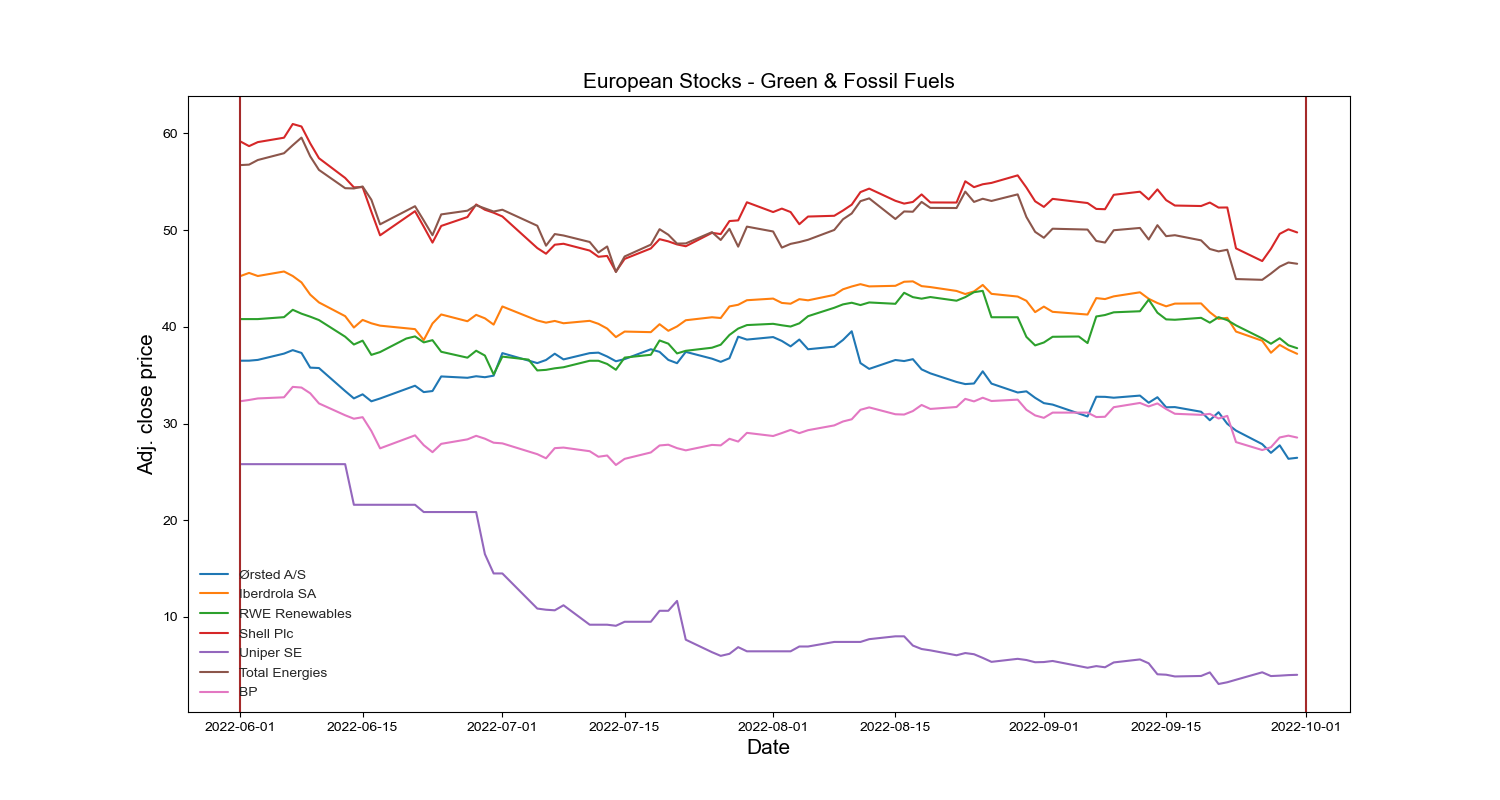

In [8]:
# Set to '%matplotlib widget' to create interactive plot (default is %matplotlib inline)
%matplotlib widget
start_date = datetime.datetime(2022, 6, 1)
end_date = datetime.datetime(2022, 10, 1)
fig, ax = plt.subplots(figsize=(15, 8))

# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('European Stocks - Green & Fossil Fuels', fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})

# Plot annotated price series
# Green Stocks
ØrstedData = getStockData("DNNGY")
IberdrolaData = getStockData("IBDRY")
RWEData = getStockData("RWE.DE")

plt.plot(ØrstedData[0], ØrstedData[1], label="Ørsted A/S")
plt.plot(IberdrolaData[0], IberdrolaData[1], label="Iberdrola SA")
plt.plot(RWEData[0], RWEData[1], label="RWE Renewables")

# Fossil Fuel Stocks
ShellData = getStockData("SHEL")
UniperData = getStockData("UNPRF")
TotalData = getStockData("TTE")
BPData = getStockData("BP")

plt.plot(ShellData[0], ShellData[1], label="Shell Plc")
plt.plot(UniperData[0], UniperData[1], label="Uniper SE")
plt.plot(TotalData[0], TotalData[1], label="Total Energies")
plt.plot(BPData[0], BPData[1], label="BP")

#plt.axvline(datetime.datetime(2019, 12, 31),0,80,color="brown")

#plt.axvline(datetime.datetime(2020, 6, 1),0,80,color="brown")
#plt.axvline(datetime.datetime(2021, 7, 1),0,80,color="brown")
#plt.axvline(datetime.datetime(2021, 12, 31),0,80,color="brown")

plt.axvline(datetime.datetime(2022, 6, 1),0,80,color="brown")
plt.axvline(datetime.datetime(2022, 10, 1),0,80,color="brown")
# plt.ion()
plt.legend()
plt.show()

Import Successful for  FSLR
Import Successful for  SPWR
Import Successful for  NEE
Import Successful for  CWEN
Import Successful for  MPC
Import Successful for  XOM
Import Successful for  OKE
Import Successful for  VLO
Import Successful for  PSX


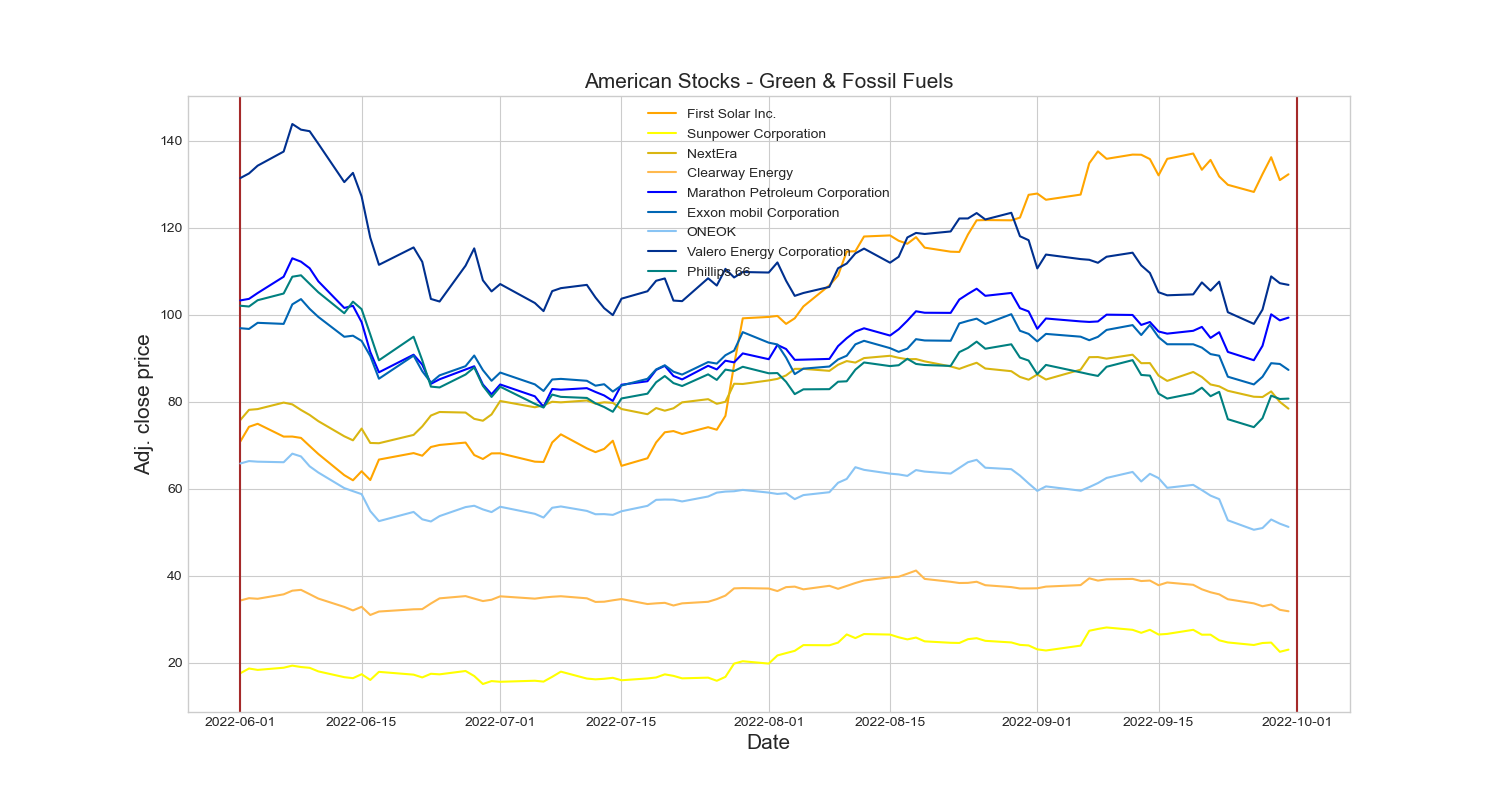

In [9]:
# Set to '%matplotlib widget' to create interactive plot (default is %matplotlib inline)
%matplotlib widget
start_date = datetime.datetime(2022, 6, 1)
end_date = datetime.datetime(2022, 10, 1)

fig, ax = plt.subplots(figsize=(15, 8))

# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('American Stocks - Green & Fossil Fuels', fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})

# Plot annotated price series
# Green Stocks
FirstSolarData = getStockData("FSLR")
SunPowerData = getStockData("SPWR")
NEData = getStockData("NEE")
ClearwayData = getStockData("CWEN")

plt.plot(FirstSolarData[0], FirstSolarData[1], label="First Solar Inc.",color="orange")
plt.plot(SunPowerData[0], SunPowerData[1], label="Sunpower Corporation",color="yellow")
plt.plot(NEData[0], NEData[1], label="NextEra",color="#D9B611")
plt.plot(ClearwayData[0], ClearwayData[1], label="Clearway Energy",color="#FFB94E")

# Fossil Fuel Stocks
MPCDATA = getStockData("MPC")
ExxonData = getStockData("XOM")
ONEOKData = getStockData("OKE")
ValData = getStockData("VLO")
PhilData = getStockData("PSX")

#plt.axvline(datetime.datetime(2019, 12, 31),0,80,color="brown")

#plt.axvline(datetime.datetime(2020, 6, 1),0,80,color="brown")
#plt.axvline(datetime.datetime(2021, 7, 1),0,80,color="brown")
#plt.axvline(datetime.datetime(2021, 12, 31),0,80,color="brown")
plt.axvline(datetime.datetime(2022, 6, 1),0,80,color="brown")
plt.axvline(datetime.datetime(2022, 10, 1),0,80,color="brown")


plt.plot(MPCDATA[0], MPCDATA[1], label="Marathon Petroleum Corporation",color="blue")
plt.plot(ExxonData[0], ExxonData[1], label="Exxon mobil Corporation",color="#0066b4")
plt.plot(ONEOKData[0], ONEOKData[1], label="ONEOK",color="#89C4F4")
plt.plot(ValData[0], ValData[1], label="Valero Energy Corporation",color="#00308f")
plt.plot(PhilData[0], PhilData[1], label="Phillips 66",color="Teal")

plt.legend()
plt.show()

Import Successful for  MPC
Import Successful for  XOM
Import Successful for  VLO
Import Successful for  PSX
Import Successful for  SHEL
Import Successful for  TTE
Import Successful for  BP


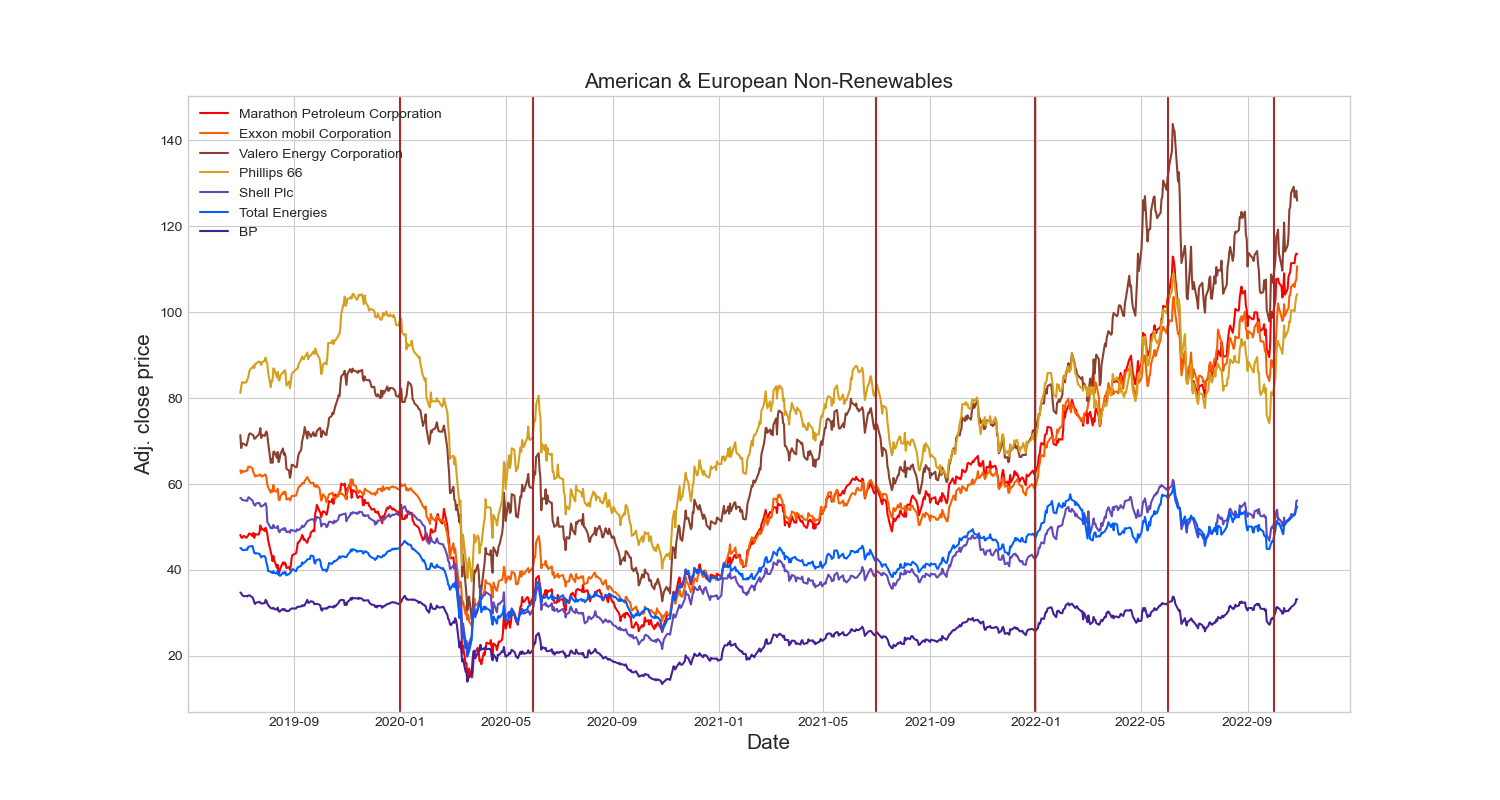

In [10]:
# All non-renewables
# Set to '%matplotlib widget' to create interactive plot (default is %matplotlib inline)
%matplotlib widget
start_date = datetime.datetime(2019, 7, 1)
end_date = datetime.datetime(2022, 10, 30)

fig, ax = plt.subplots(figsize=(15, 8))

# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('American & European Non-Renewables', fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})

# Plot annotated price series
# US Stocks
MPCDATA = getStockData("MPC")
ExxonData = getStockData("XOM")
ValData = getStockData("VLO")
PhilData = getStockData("PSX")

plt.plot(MPCDATA[0], MPCDATA[1], label="Marathon Petroleum Corporation",color="#f70202")
plt.plot(ExxonData[0], ExxonData[1], label="Exxon mobil Corporation",color="#f76002")
plt.plot(ValData[0], ValData[1], label="Valero Energy Corporation",color="#8a3f2f")
plt.plot(PhilData[0], PhilData[1], label="Phillips 66",color="#d69f1e")

# EU Stocks
ShellData = getStockData("SHEL")
TotalData = getStockData("TTE")
BPData = getStockData("BP")

plt.plot(ShellData[0], ShellData[1], label="Shell Plc", color = "#6248b8")
plt.plot(TotalData[0], TotalData[1], label="Total Energies", color = "#025dfa")
plt.plot(BPData[0], BPData[1], label="BP", color = "#432096")

plt.axvline(datetime.datetime(2019, 12, 31),0,80,color="brown")
plt.axvline(datetime.datetime(2020, 6, 1),0,80,color="brown")
plt.axvline(datetime.datetime(2021, 7, 1),0,80,color="brown")
plt.axvline(datetime.datetime(2021, 12, 31),0,80,color="brown")
plt.axvline(datetime.datetime(2022, 6, 1),0,80,color="brown")
plt.axvline(datetime.datetime(2022, 10, 1),0,80,color="brown")

plt.legend()
plt.show()

Import Successful for  FSLR
Import Successful for  SPWR
Import Successful for  NEE
Import Successful for  CWEN
Import Successful for  MPC
Import Successful for  XOM
Import Successful for  VLO
Import Successful for  PSX


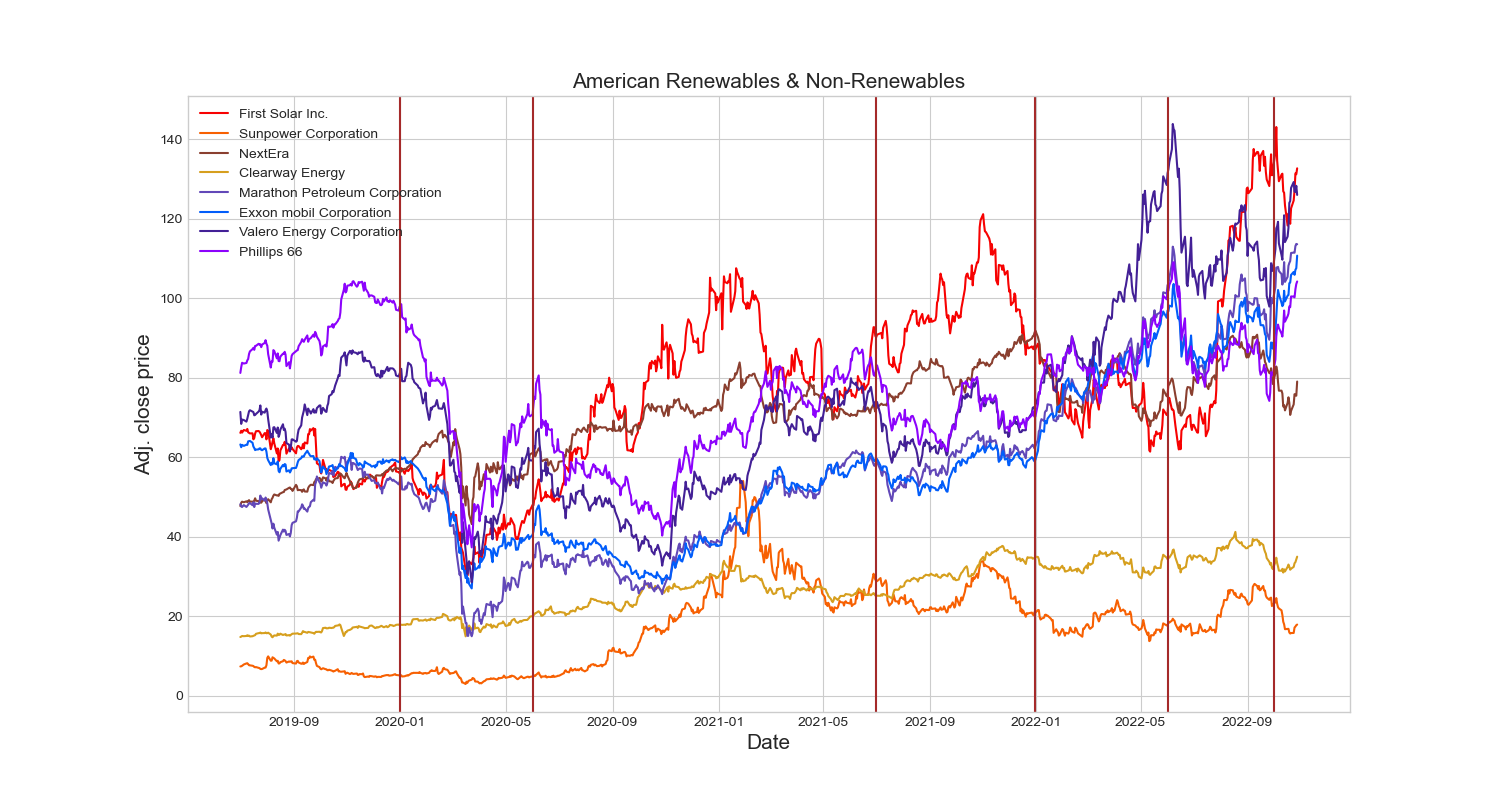

In [11]:
# All renewables
# Set to '%matplotlib widget' to create interactive plot (default is %matplotlib inline)
%matplotlib widget
start_date = datetime.datetime(2019, 7, 1)
end_date = datetime.datetime(2022, 10, 30)

fig, ax = plt.subplots(figsize=(15, 8))

# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('American Renewables & Non-Renewables', fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})

# Plot annotated price series
# US Stocks
FirstSolarData = getStockData("FSLR")
SunPowerData = getStockData("SPWR")
NEData = getStockData("NEE")
ClearwayData = getStockData("CWEN")

plt.plot(FirstSolarData[0], FirstSolarData[1], label="First Solar Inc.",color="#f70202")
plt.plot(SunPowerData[0], SunPowerData[1], label="Sunpower Corporation",color="#f76002")
plt.plot(NEData[0], NEData[1], label="NextEra",color="#8a3f2f")
plt.plot(ClearwayData[0], ClearwayData[1], label="Clearway Energy",color="#d69f1e")



# US Stocks
MPCDATA = getStockData("MPC")
ExxonData = getStockData("XOM")
ValData = getStockData("VLO")
PhilData = getStockData("PSX")

plt.plot(MPCDATA[0], MPCDATA[1], label="Marathon Petroleum Corporation",color="#6248b8")
plt.plot(ExxonData[0], ExxonData[1], label="Exxon mobil Corporation",color="#025dfa")
plt.plot(ValData[0], ValData[1], label="Valero Energy Corporation",color="#432096")
plt.plot(PhilData[0], PhilData[1], label="Phillips 66",color="#8c03fc")

plt.axvline(datetime.datetime(2019, 12, 31),0,80,color="brown")
plt.axvline(datetime.datetime(2020, 6, 1),0,80,color="brown")
plt.axvline(datetime.datetime(2021, 7, 1),0,80,color="brown")
plt.axvline(datetime.datetime(2021, 12, 31),0,80,color="brown")
plt.axvline(datetime.datetime(2022, 6, 1),0,80,color="brown")
plt.axvline(datetime.datetime(2022, 10, 1),0,80,color="brown")

plt.legend()
plt.show()

In [12]:
#Make Events
def getIndex(yyyy, m, d, date_list):
   index = "none"
   while index == "none":
       for x in range(len(date_list)):
          if (date_list[x] == datetime.datetime(yyyy, m, d)):
              index = x
              break
          elif datetime.datetime(yyyy, m, d) <= date_list[0]:
               return 0
       d -= 1
       if d == 0:
           d = 28
           m -= 1
           if m == 0:
               m = 12
               yyyy -= 1
   return index


def makeEvent(yyyy, m, d, text, ax, date_list, price_series):
   index = getIndex(yyyy, m, d, date_list)
   ax.annotate(text,
           xy=(date_list[index], price_series[index]),
           xycoords='data',
           bbox=dict(boxstyle="square", fc="none", ec="gray"),
           xytext=(0, 80),
           textcoords='offset points',
           arrowprops=dict(arrowstyle='->', color='gray'),
           va='center',
           ha='left',
           fontsize=8)

Import Successful for  DNNGY
Import Successful for  IBDRY
Import Successful for  RWE.DE
Import Successful for  ^GSPC
Import Successful for  SHEL
Import Successful for  TTE
Import Successful for  BP


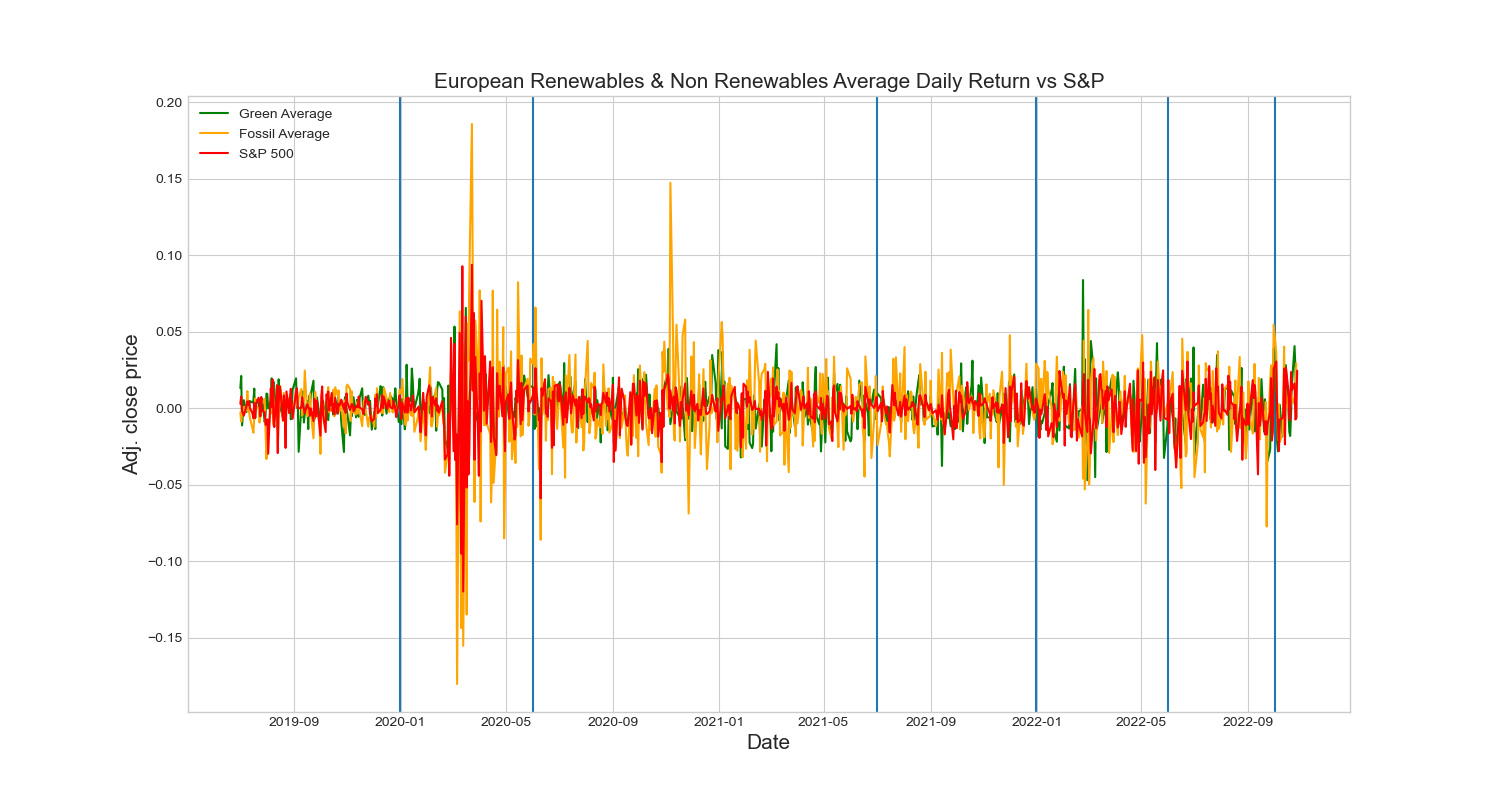

In [13]:
# Set to '%matplotlib widget' to create interactive plot (default is %matplotlib inline)
%matplotlib widget
start_date = datetime.datetime(2019,7, 1)
end_date = datetime.datetime(2022, 10, 30)
fig, ax2 = plt.subplots(figsize=(15, 8))

# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('European Renewables & Non Renewables Average Daily Return vs S&P', fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})

# Plot annotated price series
ØrstedData = getDailyReturns("DNNGY")
IberdrolaData = getDailyReturns("IBDRY")
RWEData = getDailyReturns("RWE.DE")

S_PData = getDailyReturns("^GSPC")

ShellData = getDailyReturns("SHEL")
TotalData = getDailyReturns("TTE")
BPData = getDailyReturns("BP")

plt.axvline(datetime.datetime(2019, 12, 31),0,80)
plt.axvline(datetime.datetime(2020, 6, 1),0,80)
plt.axvline(datetime.datetime(2021, 7, 1),0,80)
plt.axvline(datetime.datetime(2021, 12, 31),0,80)

plt.axvline(datetime.datetime(2022, 6, 1),0,80)
plt.axvline(datetime.datetime(2022, 10, 1),0,80)

averageGreenReturn = averageDailyReturn([ØrstedData[1], IberdrolaData[1], RWEData[1]])
averageFossilReturn = averageDailyReturn([ShellData[1], TotalData[1], BPData[1]])

plt.plot(ØrstedData[2][0:-2], averageGreenReturn, label="Green Average",color="green")
plt.plot(ShellData[2][0:-2], averageFossilReturn, label="Fossil Average", color="orange")
plt.plot(S_PData[0][0:-1], S_PData[1], label="S&P 500", color='red')
plt.legend()
plt.show()

Import Successful for  FSLR
Import Successful for  SPWR
Import Successful for  NEE
Import Successful for  CWEN
Import Successful for  MPC
Import Successful for  XOM
Import Successful for  VLO
Import Successful for  PSX
Import Successful for  ^GSPC


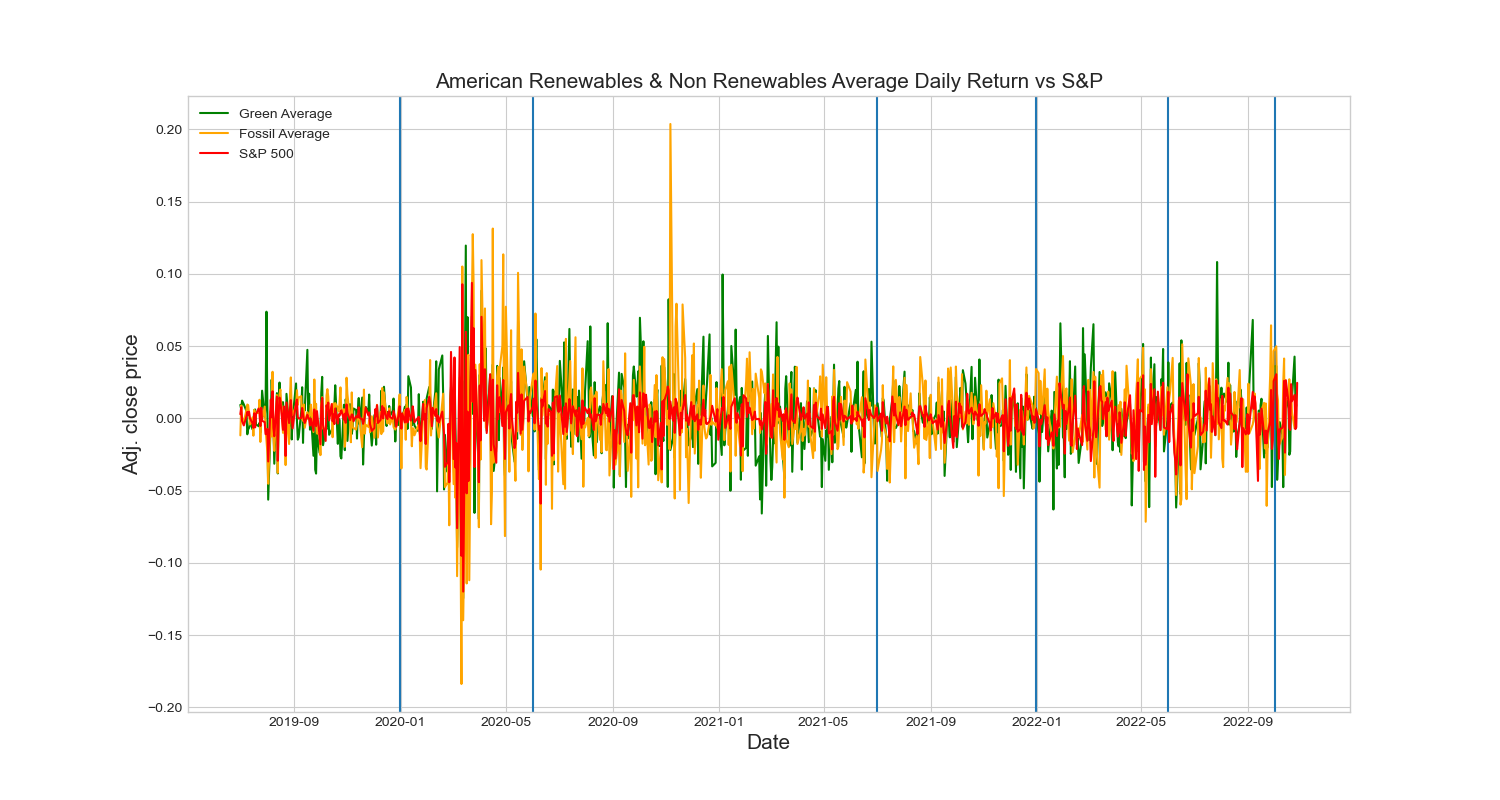

In [14]:
%matplotlib widget
start_date = datetime.datetime(2019,7, 1)
end_date = datetime.datetime(2022, 10, 30)
fig, ax2 = plt.subplots(figsize=(15, 8))

# Set gridlines
plt.style.use('seaborn-whitegrid')

# Set options for interactive plot
fig.canvas.toolbar_visible = True
fig.canvas.resizable = True

# Set labels
plt.title('American Renewables & Non Renewables Average Daily Return vs S&P', fontdict = {'fontsize' : 15})
plt.xlabel('Date', fontdict = {'fontsize' : 15})
plt.ylabel('Adj. close price', fontdict = {'fontsize' : 15})


#GREEN STOCKS
FirstSolarData = getDailyReturns("FSLR")
SunPowerData = getDailyReturns("SPWR")
NEData = getDailyReturns("NEE")
ClearwayData = getDailyReturns("CWEN")

#FOSSIL FUEL STOCKS
MPCDATA = getDailyReturns("MPC")
ExxonData = getDailyReturns("XOM")
ValData = getDailyReturns("VLO")
PhilData = getDailyReturns("PSX")

#S&P
S_PData = getDailyReturns("^GSPC")


averageGreenReturn = averageDailyReturn([FirstSolarData[1], SunPowerData[1], NEData[1],ClearwayData[1]])
averageFossilReturn = averageDailyReturn([MPCDATA[1], ExxonData[1], ValData[1],PhilData[1]])

plt.axvline(datetime.datetime(2019, 12, 31),0,80)
plt.axvline(datetime.datetime(2020, 6, 1),0,80)
plt.axvline(datetime.datetime(2021, 7, 1),0,80)
plt.axvline(datetime.datetime(2021, 12, 31),0,80)

plt.axvline(datetime.datetime(2022, 6, 1),0,80)
plt.axvline(datetime.datetime(2022, 10, 1),0,80)

plt.plot(FirstSolarData[2][0:-2], averageGreenReturn, label="Green Average" , color="green")
plt.plot(MPCDATA[2][0:-2], averageFossilReturn, label="Fossil Average",color='orange')
plt.plot(S_PData[0][0:-1], S_PData[1], label="S&P 500",color='red')
plt.legend()
plt.show()

2015-07-02 00:00:00
1846 len price series
1845 All days return
1044 Split s
0
1044 Split i
1044 Split s
1
1044 Split i
1044 Split s
2
1044 Split i
1044 Split s
3
1044 Split i
1044 Split s
4
1044 Split i
1044 Split s
5
1044 Split i
1044 Split s
6
1044 Split i
1044 Split s
7
1044 Split i
1044 Split s
8
1044 Split i
1044 Split s
9
1044 Split i
1044 Split s
10
1044 Split i
1044 Split s
11
1044 Split i
1044 Split s
12
1044 Split i
1044 Split s
13
1044 Split i
1044 Split s
14
1044 Split i
1044 Split s
15
1044 Split i
1044 Split s
16
1044 Split i
1044 Split s
17
1044 Split i
1044 Split s
18
1044 Split i
1044 Split s
19
1044 Split i
1044 Split s
20
1044 Split i
1044 Split s
21
1044 Split i
1044 Split s
22
1044 Split i
1044 Split s
23
1044 Split i
1044 Split s
24
1044 Split i
1044 Split s
25
1044 Split i
1044 Split s
26
1044 Split i
1044 Split s
27
1044 Split i
1044 Split s
28
1044 Split i
1044 Split s
29
1044 Split i
1044 Split s
30
1044 Split i
1044 Split s
31
1044 Split i
1044 Split s
32
104

0.8212869492155473

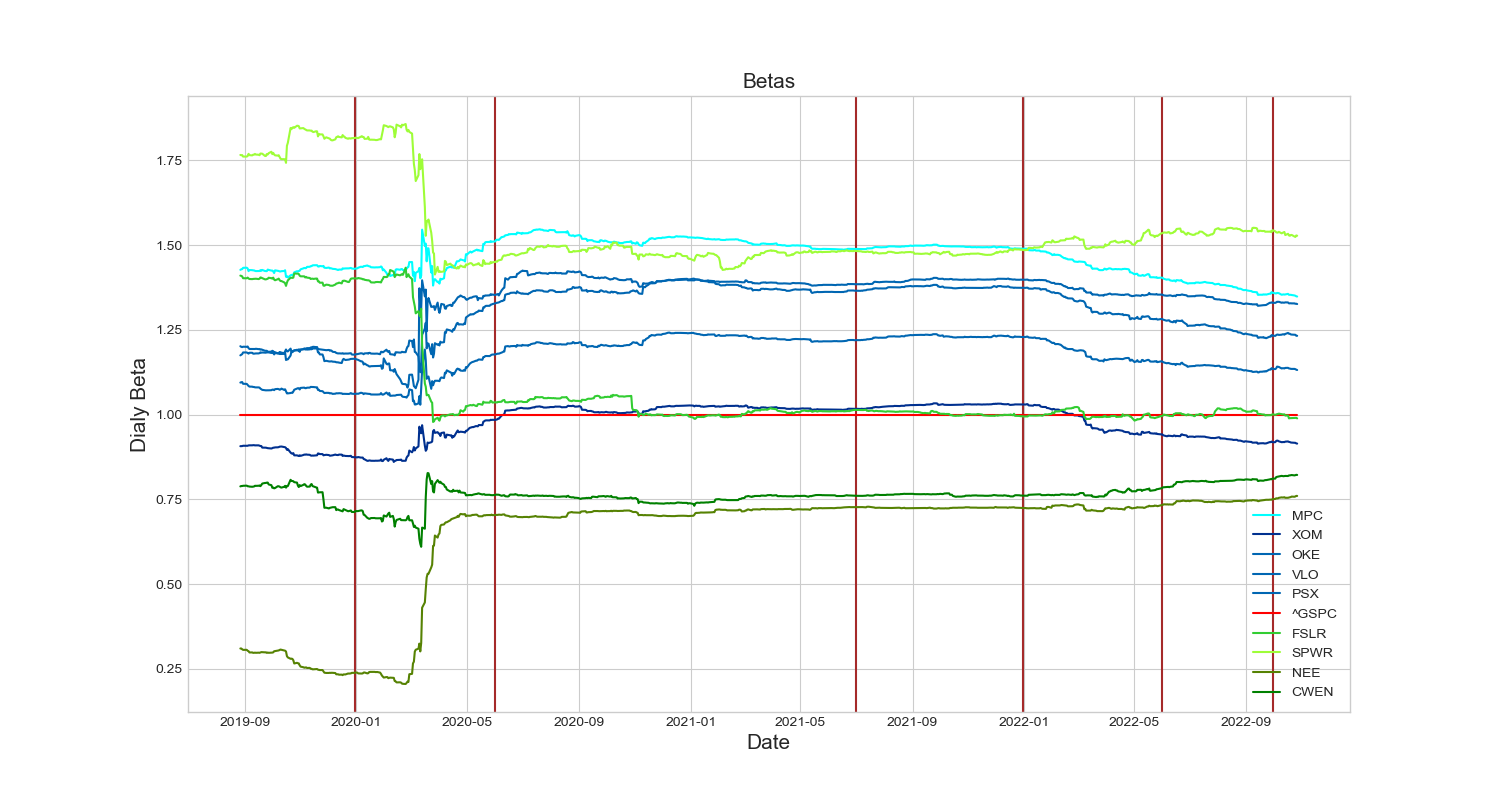

In [15]:
fig, ax2 = plt.subplots(figsize=(15, 8))
def getBeta(stock_symbol, date_end,color):
    index_symbol = "^GSPC" # Index symbol (by default "^GSPC" for the S&P500 index)

    # Generate list of trading days

    interval = 'd' # Date interval, by default daily ('d')
    date_list = get_date_list(index_symbol, start_date - timedelta(days=1460), date_end, interval=interval)

    # Generate empty dataframe
    column_header_index = "Index price ({})".format(index_symbol)
    column_header_stock = "Stock price ({})".format(stock_symbol)
    df = pd.DataFrame(
            columns=[column_header_index, column_header_stock], index=date_list
        )

    # Sort dataframe based on date
    df = df.sort_index(ascending=False)
    print(start_date -timedelta(days=1460))

    # Import price series into dataframe
    try:
        index_price_series = read_price_data(index_symbol, start_date - timedelta(days=1460), date_end, interval=interval)
        df[column_header_index] = index_price_series

        stock_price_series = read_price_data(stock_symbol, start_date - timedelta(days=1460), date_end, interval=interval)
        df[column_header_stock] = stock_price_series

        stockTicker = yahooFinance.Ticker(stock_symbol)
        yahooStockBeta = stockTicker.info["beta"]

    except Exception as e: print(e)


    print(len(index_price_series),"len price series")
    length = len(index_price_series)
    stock_return = []
    index_return = []
    for(x) in range(length - 1):
        day_return_index = (index_price_series[x + 1] - index_price_series[x]) / index_price_series[x]
        index_return.append(day_return_index)
        day_return_stock = (stock_price_series[x + 1] - stock_price_series[x]) / stock_price_series[x]
        stock_return.append(day_return_stock)

    import matplotlib.pyplot as plt



    print(len(stock_return),"All days return")
    betasList=[]
    z=0

    while(z<801):

        index_returnSplit = index_return[z:-(801-z)]
        stock_returnSplit = stock_return[z:-(801-z)]
        print(len(stock_returnSplit),"Split s")
        print(z)
        print(len(index_returnSplit),"Split i")
        x1 = np.array(index_returnSplit)
        y1 = np.array(stock_returnSplit)
        #obtain m (slope) and b(intercept) of linear regression line
        m, b = np.polyfit(x1, y1, 1)

        betasList.append(m)
        z+=1


    betasList = betasList[0:len(betasList)-1]

    goodDate = date_list[len(date_list)-801:len(date_list)-1]



    plt.plot(goodDate,betasList,color=color, label=stock_symbol)
    plt.legend()
    plt.title('Betas', fontdict = {'fontsize' : 15})
    plt.xlabel('Date', fontdict = {'fontsize' : 15})
    plt.ylabel('Dialy Beta', fontdict = {'fontsize' : 15})
    plt.style.use('seaborn-whitegrid')
    fig.canvas.toolbar_visible = True
    fig.canvas.resizable = True


    return m
plt.axvline(datetime.datetime(2019, 12, 31),0,80,color="brown")

plt.axvline(datetime.datetime(2020, 6, 1),0,80,color="brown")
plt.axvline(datetime.datetime(2021, 7, 1),0,80,color="brown")
plt.axvline(datetime.datetime(2021, 12, 31),0,80,color="brown")

plt.axvline(datetime.datetime(2022, 6, 1),0,80,color="brown")
plt.axvline(datetime.datetime(2022, 10, 1),0,80,color="brown")

#FOSSIL US
getBeta("MPC",end_date,'#00FFFF')
getBeta("XOM",end_date,'#00308F' )
getBeta("OKE",end_date,'#0066b2')
getBeta("VLO",end_date,'#0066b2')
getBeta("PSX",end_date,'#0066b2')
#S&P
getBeta("^GSPC",end_date,'RED')
#GREEN US
getBeta("FSLR",end_date,'#32CD32' )
getBeta("SPWR",end_date,'#9EFD38')
getBeta("NEE",end_date,'#568203')
getBeta("CWEN",end_date,'GREEN')





In [ ]:
def getRWEBeta(stock_symbol, date_end,color):
    index_symbol = "^GSPC" # Index symbol (by default "^GSPC" for the S&P500 index)

    # Generate list of trading days

    interval = 'd' # Date interval, by default daily ('d')
    date_list = get_date_list(index_symbol, start_date - timedelta(days=1460), date_end, interval=interval)

    # Generate empty dataframe
    column_header_index = "Index price ({})".format(index_symbol)
    column_header_stock = "Stock price ({})".format(stock_symbol)
    df = pd.DataFrame(
            columns=[column_header_index, column_header_stock], index=date_list
        )

    # Sort dataframe based on date
    df = df.sort_index(ascending=False)
    print(start_date -timedelta(days=1460))

    # Import price series into dataframe
    try:
        index_price_series = read_price_data(index_symbol, start_date - timedelta(days=1460), date_end, interval=interval)
        df[column_header_index] = index_price_series

        stock_price_series = read_price_data(stock_symbol, start_date - timedelta(days=1460), date_end, interval=interval)
        df[column_header_stock] = stock_price_series
        print(df)

        stockTicker = yahooFinance.Ticker(stock_symbol)

    except Exception as e: print(e)


    print(len(index_price_series),"len price series")
    length = len(stock_price_series)-1
    print(length)
    print(len(stock_price_series))
    stock_return = []
    index_return = []
    for(x) in range(length - 1):
        if (x >= len(index_price_series)-1) or (x >= len(stock_price_series)-1):
            continue
        day_return_index = (index_price_series[x + 1] - index_price_series[x]) / index_price_series[x]
        index_return.append(day_return_index)

        day_return_stock = (stock_price_series[x+1] - stock_price_series[x]) / stock_price_series[x]
        stock_return.append(day_return_stock)





    print(len(stock_return),"All days return")
    betasList=[]
    z=0

    while(z<801):

        index_returnSplit = index_return[z:-(801-z)]
        stock_returnSplit = stock_return[z:-(801-z)]
        #print(len(stock_returnSplit),"Split s")
        #print(z)
        #print(len(index_returnSplit),"Split i")
        x1 = np.array(index_returnSplit)
        y1 = np.array(stock_returnSplit)
        #obtain m (slope) and b(intercept) of linear regression line
        m, b = np.polyfit(x1, y1, 1)

        betasList.append(m)
        z+=1


    betasList = betasList[0:len(betasList)-1]

    goodDate = date_list[len(date_list)-801:len(date_list)-1]



    plt.plot(goodDate,betasList,color=color, label=stock_symbol)
    plt.legend()
    plt.title('Betas', fontdict = {'fontsize' : 15})
    plt.xlabel('Date', fontdict = {'fontsize' : 15})
    plt.ylabel('Daily Beta', fontdict = {'fontsize' : 15})
    plt.style.use('seaborn-whitegrid')
    fig.canvas.toolbar_visible = True
    fig.canvas.resizable = True


    return m


2015-07-02 00:00:00
1846 len price series
1263
1264
1262 All days return
2015-07-02 00:00:00
1846 len price series
1845
1846
1844 All days return
2015-07-02 00:00:00
            Index price (^GSPC)  Stock price (RWE.DE)
Date                                                 
2022-10-28          3901.060059             38.770000
2022-10-27          3807.300049             38.900002
2022-10-26          3830.600098             38.770000
2022-10-25          3859.110107             39.150002
2022-10-24          3797.340088             38.380001
...                         ...                   ...
2015-07-09          2051.310059             15.549981
2015-07-08          2046.680054             15.357611
2015-07-07          2081.340088             15.233370
2015-07-06          2068.760010             15.421736
2015-07-02          2076.780029             16.267365

[1846 rows x 2 columns]
1846 len price series
1863
1864
1845 All days return
2015-07-02 00:00:00
1846 len price series
1845
1846
18

0.9591982395677002

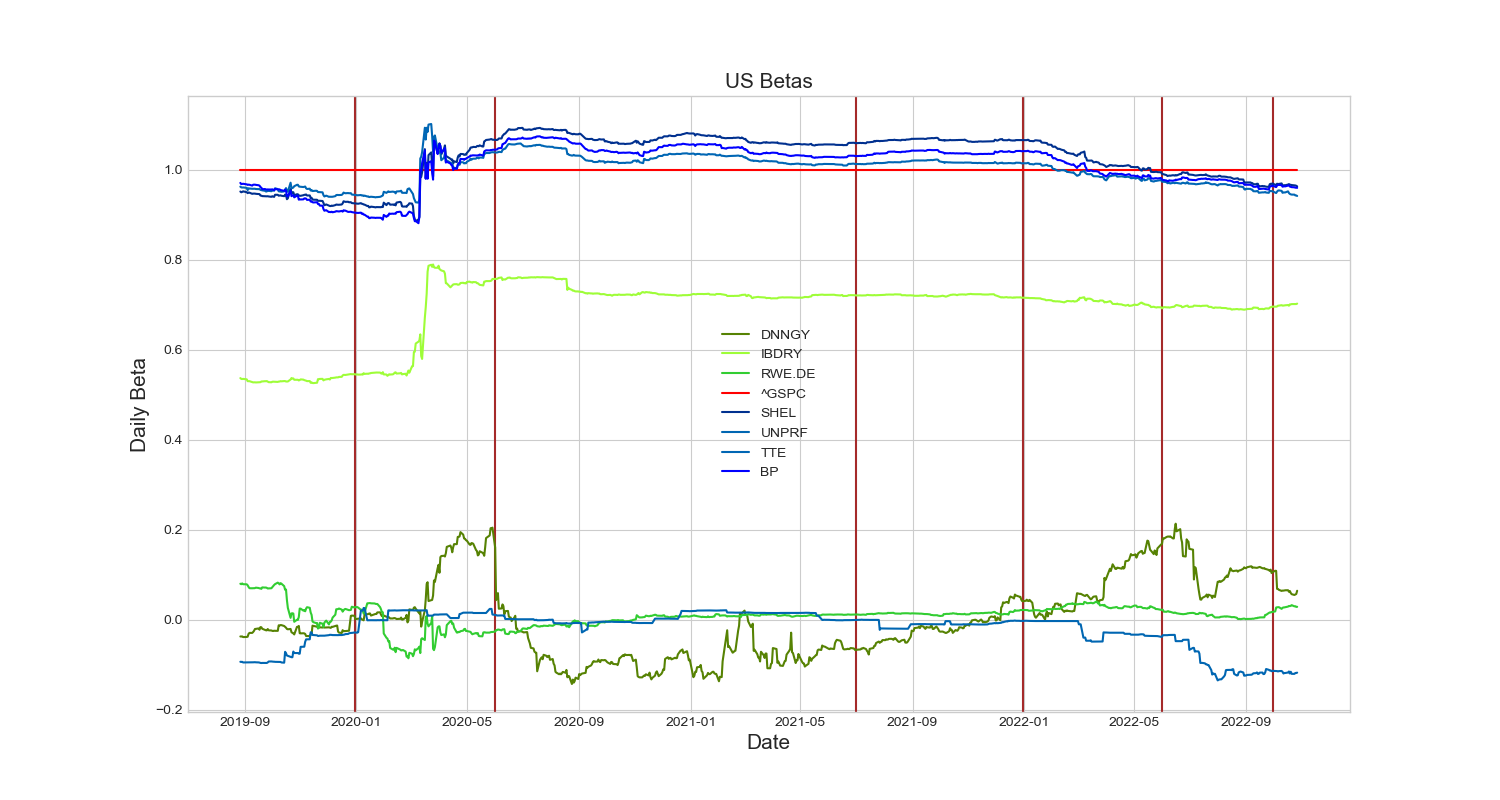

In [24]:
fig, ax2 = plt.subplots(figsize=(15, 8))
def getBeta(stock_symbol, date_end,color):
    index_symbol = "^GSPC" # Index symbol (by default "^GSPC" for the S&P500 index)

    # Generate list of trading days

    interval = 'd' # Date interval, by default daily ('d')
    date_list = get_date_list(index_symbol, start_date - timedelta(days=1460), date_end, interval=interval)

    # Generate empty dataframe
    column_header_index = "Index price ({})".format(index_symbol)
    column_header_stock = "Stock price ({})".format(stock_symbol)
    df = pd.DataFrame(
            columns=[column_header_index, column_header_stock], index=date_list
        )

    # Sort dataframe based on date
    df = df.sort_index(ascending=False)
    print(start_date -timedelta(days=1460))

    # Import price series into dataframe
    try:
        index_price_series = read_price_data(index_symbol, start_date - timedelta(days=1460), date_end, interval=interval)
        df[column_header_index] = index_price_series

        stock_price_series = read_price_data(stock_symbol, start_date - timedelta(days=1460), date_end, interval=interval)
        df[column_header_stock] = stock_price_series

        stockTicker = yahooFinance.Ticker(stock_symbol)
        yahooStockBeta = stockTicker.info["beta"]

    except Exception as e: print(e)


    print(len(index_price_series),"len price series")
    length = len(stock_price_series)-1
    print(length)
    print(len(stock_price_series))
    stock_return = []
    index_return = []
    for(x) in range(length - 1):
        day_return_index = (index_price_series[x + 1] - index_price_series[x]) / index_price_series[x]
        index_return.append(day_return_index)

        day_return_stock = (stock_price_series[x+1] - stock_price_series[x]) / stock_price_series[x]
        stock_return.append(day_return_stock)





    print(len(stock_return),"All days return")
    betasList=[]
    z=0

    while(z<801):

        index_returnSplit = index_return[z:-(801-z)]
        stock_returnSplit = stock_return[z:-(801-z)]
        #print(len(stock_returnSplit),"Split s")
        #print(z)
        #print(len(index_returnSplit),"Split i")
        x1 = np.array(index_returnSplit)
        y1 = np.array(stock_returnSplit)
        #obtain m (slope) and b(intercept) of linear regression line
        m, b = np.polyfit(x1, y1, 1)

        betasList.append(m)
        z+=1


    betasList = betasList[0:len(betasList)-1]

    goodDate = date_list[len(date_list)-801:len(date_list)-1]



    plt.plot(goodDate,betasList,color=color, label=stock_symbol)
    plt.legend()
    plt.title('US Betas', fontdict = {'fontsize' : 15})
    plt.xlabel('Date', fontdict = {'fontsize' : 15})
    plt.ylabel('Daily Beta', fontdict = {'fontsize' : 15})
    plt.style.use('seaborn-whitegrid')
    fig.canvas.toolbar_visible = True
    fig.canvas.resizable = True


    return m
plt.axvline(datetime.datetime(2019, 12, 31),0,80,color="brown")

plt.axvline(datetime.datetime(2020, 6, 1),0,80,color="brown")
plt.axvline(datetime.datetime(2021, 7, 1),0,80,color="brown")
plt.axvline(datetime.datetime(2021, 12, 31),0,80,color="brown")

plt.axvline(datetime.datetime(2022, 6, 1),0,80,color="brown")
plt.axvline(datetime.datetime(2022, 10, 1),0,80,color="brown")

#FOSSIL US
getBeta("DNNGY",end_date,'#568203' )
getBeta("IBDRY",end_date,'#9EFD38')
#getBeta("RWE.DE",end_date,'#32CD32') --- doesnt work
getRWEBeta("RWE.DE",end_date,'#32CD32')

#S&P
getBeta("^GSPC",end_date,'RED')
#GREEN US
getBeta("SHEL",end_date,'#00308F' )
getBeta("UNPRF",end_date,'#0066b2')
getBeta("TTE",end_date,'#0066b4')
getBeta("BP",end_date,'BLUE')






2015-07-02 00:00:00
            Index price (^GSPC)  Stock price (^GSPC)
Date                                                
2022-10-28          3901.060059          3901.060059
2022-10-27          3807.300049          3807.300049
2022-10-26          3830.600098          3830.600098
2022-10-25          3859.110107          3859.110107
2022-10-24          3797.340088          3797.340088
...                         ...                  ...
2015-07-09          2051.310059          2051.310059
2015-07-08          2046.680054          2046.680054
2015-07-07          2081.340088          2081.340088
2015-07-06          2068.760010          2068.760010
2015-07-02          2076.780029          2076.780029

[1846 rows x 2 columns]
1846 len price series
1845
1846
1844 All days return
2015-07-02 00:00:00
            Index price (^GSPC)  Stock price (RWE.DE)
Date                                                 
2022-10-28          3901.060059             38.770000
2022-10-27          3807.300049

0.02868936174691967

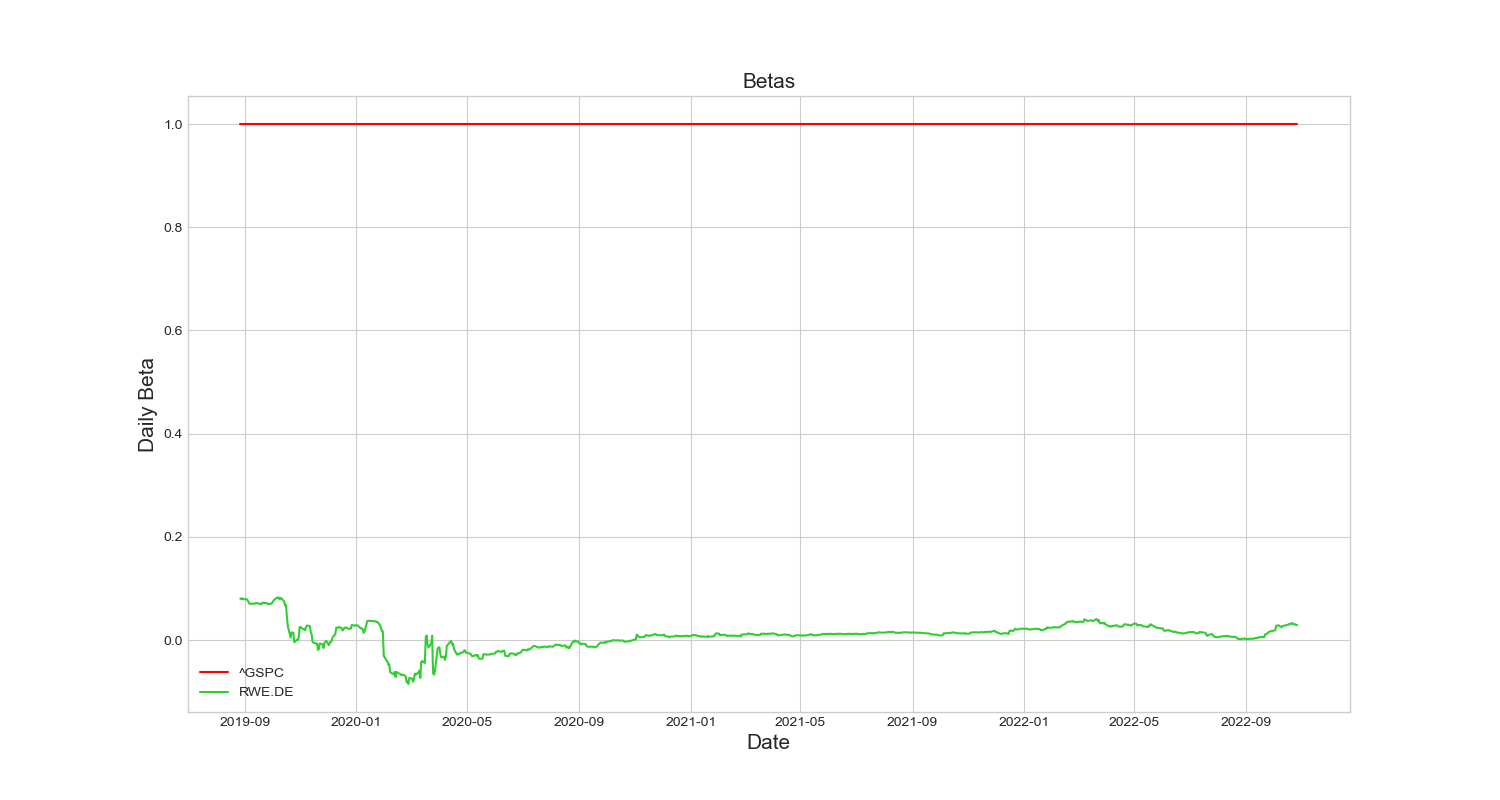

In [22]:
#S&P